In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

## 1. gather the historical data

In [2]:
# URL of the Wikipedia page
url = 'https://en.wikipedia.org/wiki/AEX_index'

# Read the tables from the Wikipedia page
tables = pd.read_html(url)

# Assuming the constituents table is the first table on the page
constituents_table = tables[3]

# Save the table to a CSV file
constituents_table.to_csv('AEX_composition.csv', index=False)

print("CSV file has been created successfully.")


CSV file has been created successfully.


In [3]:
AEX = pd.read_csv('./AEX_composition.csv')

In [4]:
AEX

,Company,ICB Sector,Ticker symbol,Index weighting (%)
0,Adyen,"support services, financial administration",ADYEN,6.90
1,Aegon,life insurance,AGN,0.81
2,Ahold Delhaize,food retailers & wholesalers,AD,3.40
3,AkzoNobel,specialty chemicals,AKZA,2.58
4,ArcelorMittal,iron & steel,MT,2.41
5,ASM International,semiconductors,ASM,1.70
6,ASML Holding,semiconductors,ASML,17.62
7,Universal Music Group,entertainment,UMG,0.57
8,BE Semiconductors,semiconductors,BESI,0.66
9,DSM Firmenich AG,specialty chemicals,DSFIR,3.71


In [5]:
def yf_ticker(ticker):
   return ticker + '.PA' if ticker=='URW' else ticker + '.AS'

In [6]:
AEX['yf_ticker'] = AEX['Ticker symbol'].apply(lambda x: yf_ticker(x))

In [7]:
df = AEX
# Create an empty DataFrame to store the combined data
combined_df = pd.DataFrame()

# Loop through the tickers in the yf_ticker column
for ticker in df['yf_ticker']:
    try:
        # Download 2 years of historical data for the ticker
        stock_data = yf.download(ticker, period="2y")

        # Add a column for the ticker symbol
        stock_data['Ticker'] = ticker

        # Append the stock data to the combined DataFrame
        combined_df = pd.concat([combined_df, stock_data])
    except Exception as e:
        print(f"Error retrieving data for {ticker}: {e}")

combined_df.reset_index(inplace=True)
# Save the combined data to a new CSV file
combined_df.to_csv('combined_stock_data.csv')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [8]:
AEX_historical_price = combined_df

In [9]:
AEX_historical_price

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2022-09-06,1495.800049,1518.800049,1461.800049,1493.400024,1493.400024,49682,ADYEN.AS
1,2022-09-07,1475.199951,1508.800049,1461.800049,1499.599976,1499.599976,49212,ADYEN.AS
2,2022-09-08,1516.800049,1521.800049,1446.199951,1455.000000,1455.000000,91042,ADYEN.AS
3,2022-09-09,1455.000000,1505.000000,1455.000000,1487.599976,1487.599976,116728,ADYEN.AS
4,2022-09-12,1496.599976,1530.800049,1479.599976,1516.599976,1516.599976,82521,ADYEN.AS
...,...,...,...,...,...,...,...,...
12533,2024-09-02,154.300003,154.649994,153.449997,154.399994,154.399994,226622,WKL.AS
12534,2024-09-03,155.149994,155.399994,153.800003,154.199997,154.199997,328394,WKL.AS
12535,2024-09-04,153.199997,153.699997,152.550003,153.500000,153.500000,412365,WKL.AS
12536,2024-09-05,153.600006,154.300003,148.449997,150.300003,150.300003,395813,WKL.AS


In [10]:
AEX_historical_price['Return'] = AEX_historical_price['Close'].pct_change()

In [11]:
AEX_historical_price.dropna(inplace=True)

In [12]:
AEX_Return = AEX_historical_price

In [13]:
AEX_Return.to_csv('AEX_Return.csv')

## 2. Select top 10 stocks that decreases most everyday

In [14]:
# Group by the 'Date' column and pick the 10 lowest 'Return' values for each day
lowest_returns_perday = AEX_Return.groupby('Date').apply(lambda x: x.nsmallest(10, 'Return')).reset_index(drop=True)

lowest_returns_perday.reset_index(drop=True, inplace=True)

In [15]:
lowest_returns_perday.to_csv('lowest_returns_per_day.csv')

## 3. Mean square regression to simulate the trading process

In [16]:
# Load the provided CSV files
AEX_return = pd.read_csv('./AEX_Return.csv')
lowest_returns_eachday = pd.read_csv('./lowest_returns_per_day.csv')

# Initial parameters
initial_capital = 1000000
portfolio_value = initial_capital

# List to store daily investments
daily_investments = []
daily_portfolio_value = []

# Loop through each trading day in the lowest_returns_eachday dataframe
trading_days = lowest_returns_eachday['Date'].unique()

for date in trading_days:
    # Filter the stocks for the current trading day
    day_data = lowest_returns_eachday[lowest_returns_eachday['Date'] == date]

    # Equal investment in 10 stocks
    investment_per_stock = portfolio_value / 10

    # Record daily investment details
    investments = []
    for index, row in day_data.iterrows():
        ticker = row['Ticker']
        close_price = row['Close']
        shares_bought = investment_per_stock / close_price
        investments.append({'Date': date, 'Ticker': ticker, 'Close Price': close_price, 'Amount Invested': investment_per_stock, 'Shares Bought': shares_bought})

    daily_investments.append(investments)

    # Calculate portfolio value for the next trading day
    next_day_data = AEX_return[(AEX_return['Date'] > date) & (AEX_return['Ticker'].isin(day_data['Ticker'].values))]

    if next_day_data.empty:
        break

    # Sum up the new value of the portfolio based on the returns
    new_portfolio_value = 0
    for stock in investments:
        stock_ticker = stock['Ticker']
        stock_shares = stock['Shares Bought']
        new_close_price = next_day_data[next_day_data['Ticker'] == stock_ticker]['Close'].values[0]
        new_portfolio_value += stock_shares * new_close_price

    portfolio_value = new_portfolio_value
    daily_portfolio_value.append({'Date': date, 'Portfolio Value': portfolio_value})

# Convert the lists into dataframes
investment_df = pd.DataFrame([item for sublist in daily_investments for item in sublist])
portfolio_value_df = pd.DataFrame(daily_portfolio_value)

# Display the results to the user
investment_df.to_csv('investment_data.csv', index=False)
portfolio_value_df.to_csv('portfolio_value_data.csv', index=False)

print("Investment Data and Portfolio Value Data Saved!")

Investment Data and Portfolio Value Data Saved!


In [17]:
investment_df

,Date,Ticker,Close Price,Amount Invested,Shares Bought
0,2022-09-06,AGN.AS,4.435000,100000.000000,22547.914609
1,2022-09-06,UMG.AS,19.346001,100000.000000,5169.027010
2,2022-09-06,INGA.AS,8.640000,100000.000000,11574.073614
3,2022-09-06,KPN.AS,3.170000,100000.000000,31545.740566
4,2022-09-06,PHIA.AS,16.057697,100000.000000,6227.542976
...,...,...,...,...,...
5135,2024-09-06,RAND.AS,42.720001,127821.083794,2992.066483
5136,2024-09-06,TKWY.AS,12.525000,127821.083794,10205.276462
5137,2024-09-06,SHELL.AS,30.430000,127821.083794,4200.495646
5138,2024-09-06,AKZA.AS,57.919998,127821.083794,2206.855798


In [18]:
portfolio_value_df

,Date,Portfolio Value
0,2022-09-06,9.945755e+05
1,2022-09-07,1.001914e+06
2,2022-09-08,1.016772e+06
3,2022-09-09,1.034555e+06
4,2022-09-12,1.012119e+06
...,...,...
508,2024-08-30,1.324827e+06
509,2024-09-02,1.314153e+06
510,2024-09-03,1.287545e+06
511,2024-09-04,1.285285e+06


## 4. Plot and Analyse the trading scheme and index

[*********************100%***********************]  1 of 1 completed


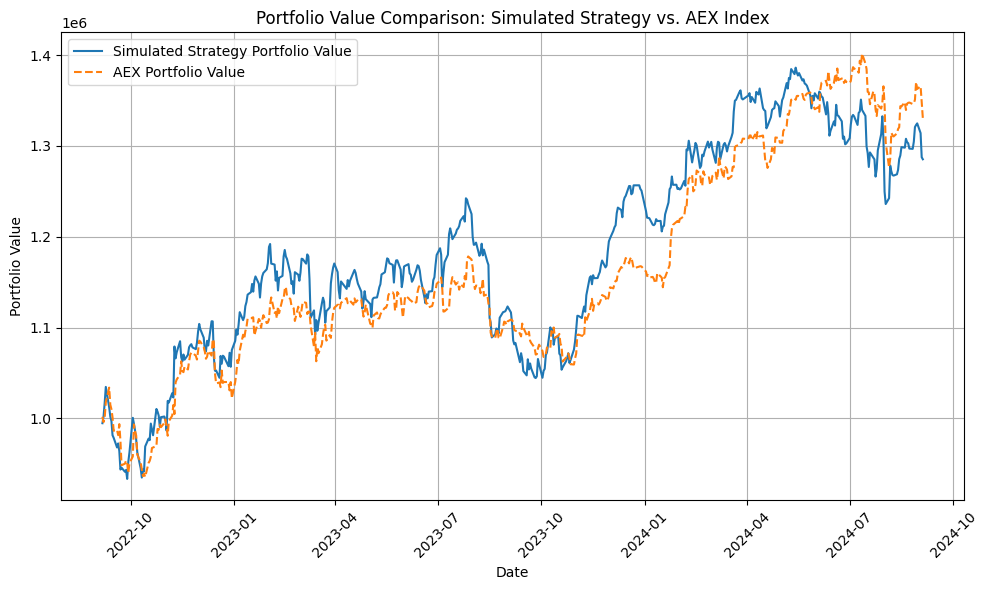

In [19]:
# Step 1: Download CSI 300 Index Data from Yahoo Finance
AEX_index = yf.download('^AEX', start='2022-09-05', end='2024-09-05')

# Step 2: Calculate the portfolio value of investing 1,000,000 in CSI 300 index
initial_investment_csi_300 = 1000000
initial_price_csi_300 = AEX_index['Close'].iloc[0]
AEX_index['Portfolio Value'] = (AEX_index['Close'] / initial_price_csi_300) * initial_investment_csi_300

# Step 3: Load the simulated strategy portfolio value data
portfolio_value_df = pd.read_csv('portfolio_value_data.csv')

# Step 4: Convert the 'Date' column to datetime format and align it with the CSI 300 index data
portfolio_value_df['Date'] = pd.to_datetime(portfolio_value_df['Date'])
AEX_index['Date'] = AEX_index.index
AEX_index.reset_index(drop=True, inplace=True)

# Step 5: Merge both datasets on the 'Date' column
comparison_df = pd.merge(portfolio_value_df, AEX_index[['Date', 'Portfolio Value']], on='Date', how='inner', suffixes=('_Simulated', '_AEX'))

# Step 6: Plot the comparison of portfolio values
plt.figure(figsize=(10, 6))
plt.plot(comparison_df['Date'], comparison_df['Portfolio Value_Simulated'], label='Simulated Strategy Portfolio Value')
plt.plot(comparison_df['Date'], comparison_df['Portfolio Value_AEX'], label='AEX Portfolio Value', linestyle='--')
plt.title('Portfolio Value Comparison: Simulated Strategy vs. AEX Index')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()
